# Medical Cost Personal Insurance Datasets  Insurance Forecast by using Linear Regression

Predicting Medical Charges

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading the dataset

df = pd.read_csv('medical_cost_insurance.csv')


# EDA

In [3]:
# displays top 5 rows in the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There are total 7 features. Out of 7 features, charges is dependent vaiable or target and the rest 6 features are independent variables

In [4]:
# checking the data dimension

df.shape

(1338, 7)

Number of Rows: 1338
Number of columns: 7

In [5]:
# checking the datatypes of every column

df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

There are 4 features which are numerical(age and children are int and bmi and charges are float)
and 3 features(sex, smoker and region) are string or object data type(categorical).
As the target feature or label, here, charges is, continous data. So it is regression problem.

In [6]:
# printing the information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
# Summary of the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


describe() shows values only for the numerical columns

In [8]:
# we can use describe method for categorical columns also
# separating only categorical features

cat_features = df.dtypes[df.dtypes == 'object'].index
len(cat_features)


3

In [9]:
# describe method for categorical columns

df[cat_features].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
# check the unique values in categorical column
# for gender or sex

df['sex'].unique()

array(['female', 'male'], dtype=object)

we can observe that there 2 values that column sex takes i.e., male and female

In [11]:
print(df.sex.value_counts())

male      676
female    662
Name: sex, dtype: int64


Total male = 676
Total Female = 662
Male count is greater than female

In [12]:
# for smoker

df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
# displays number or how many unique values are there

df['smoker'].nunique()

2

we can observe that there 2 values that column smoker takes i.e., yes and no

In [14]:
print(df.smoker.value_counts())

no     1064
yes     274
Name: smoker, dtype: int64


Non smokers count = 1064
Smokers count = 274

In [15]:
# for region

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

we can observe that there 4 values that column region takes i.e., southwest,southeast,northwest and northeast

In [16]:
df['region'].nunique() # displays how many unique values the column takes

4

In [17]:
print(df.region.value_counts())

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


southwest count = 325,southeast count=364,northwest count=325 and northeast count=324

In [18]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [19]:
df['age'].nunique()

47

In [20]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [21]:
# checking for any duplicates

In [22]:
# first check the shape

df.shape

(1338, 7)

In [23]:
df = df.drop_duplicates()


In [24]:
# checking again after removing any duplicates

df.shape

(1337, 7)

There was one duplicate as before removing duplicates, shape has 1338 rows and after removing shape has 1337 rows

In [25]:
# Checking for null values, if any

df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see that there are no NULL values. No further need of cleaning

# Data Visualization

For categorical data , we can use countplot that gives the frequency of the classes of the columns

male      675
female    662
Name: sex, dtype: int64


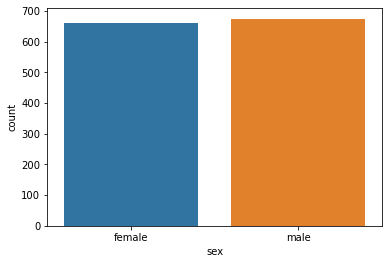

In [26]:
# countplot for sex

ax = sns.countplot(x='sex', data=df)
print(df['sex'].value_counts())

From the above observation male count is 675, which is greater than female count i.e., 662

no     1063
yes     274
Name: smoker, dtype: int64


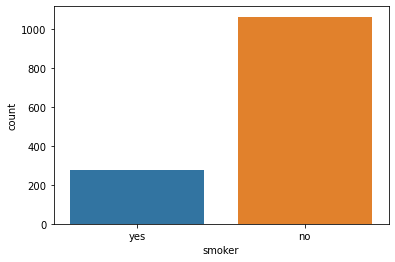

In [27]:
# countplot for smoker

ax = sns.countplot(x='smoker', data=df)
print(df['smoker'].value_counts())

From the above observation, there are more non-smokers

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64


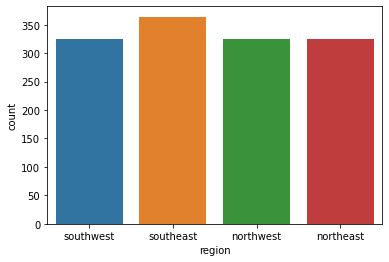

In [28]:
# countplot for region

ax = sns.countplot(x='region', data=df)
print(df['region'].value_counts())

We can observe that more number of southeast region residents are taking the insurance, next southwest, then northwest and lst northeast

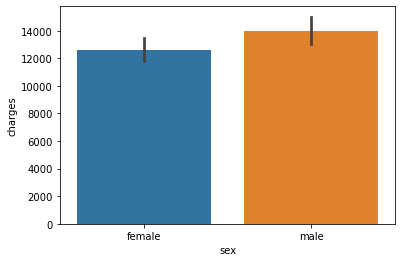

In [29]:
# comparing categorical data with target variable

sns.barplot(x='sex',y='charges',data=df)
plt.show()

We observe that male has more charges than female

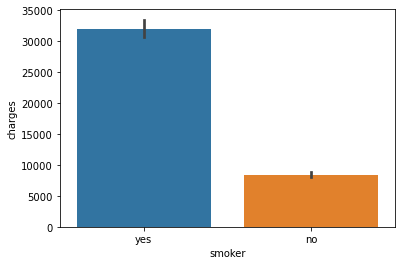

In [30]:
sns.barplot(x='smoker',y='charges',data=df)
plt.show()

We can observe that smokers are charged more than non-smokers

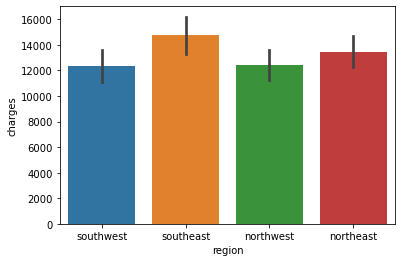

In [31]:
sns.barplot(x='region',y='charges',data=df)
plt.show()

Southeast region people has more charges when compared to other regions

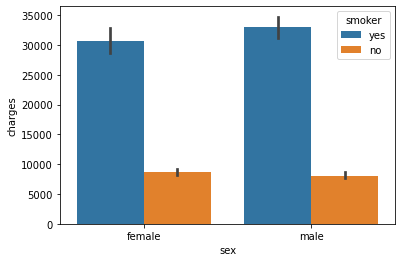

In [32]:
sns.barplot(x='sex',y='charges',hue='smoker',data=df)
plt.show()

we can see that male smokers are charged more

# checking the distribution of the numerical data

In [33]:
# separating numerical features for plotting distribution graph

num_features = df.dtypes[df.dtypes != 'object'].index
num_features

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [34]:
df[num_features].head()
df1 = df[num_features]

In [35]:
df1.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

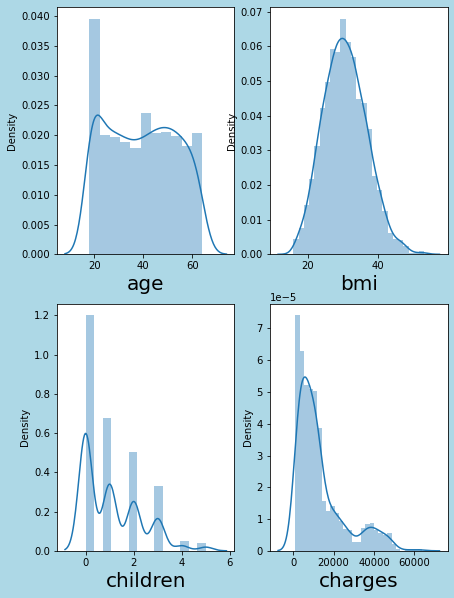

In [36]:
# let's see how data is distributed for every column

plt.figure(figsize=(7,10), facecolor='lightblue')
plotnumber = 1

for column in df1:
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

feature bmi is distributed normally but other features have skewness, feature children being nominal data, its skewness cannot be considered. charges being target variable whose skewness cannot be considered 

In [37]:
df1.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
# check the skewnwss
df1.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

# convert categorical variables into numerical variables 

In [40]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [41]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [42]:
for i in df.columns:
    if df[i].dtypes =='object':
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


In [44]:
df['region'].unique()

array([3., 2., 1., 0.])

In [45]:
# Describe the data set

df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


# corelation betwen feature and target variable

In [46]:
df.corr()['charges'].sort_values()

region     -0.006547
sex         0.058044
children    0.067389
bmi         0.198401
age         0.298308
smoker      0.787234
charges     1.000000
Name: charges, dtype: float64

From the above observation, smoker is highly corelated to the target variable(0.78)

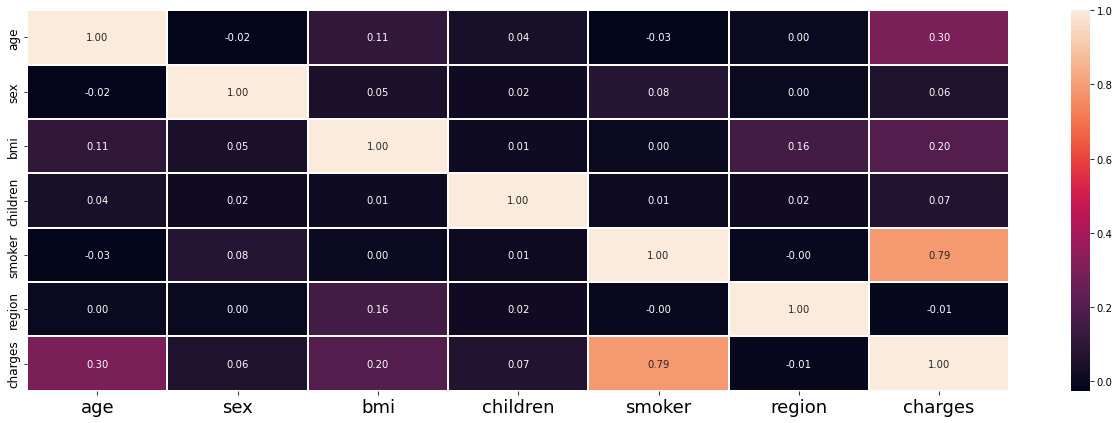

In [47]:
# heatmap for correlation

plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,fmt='0.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.show()

# Checking the columns which are positively and negative correltaed with the target columns

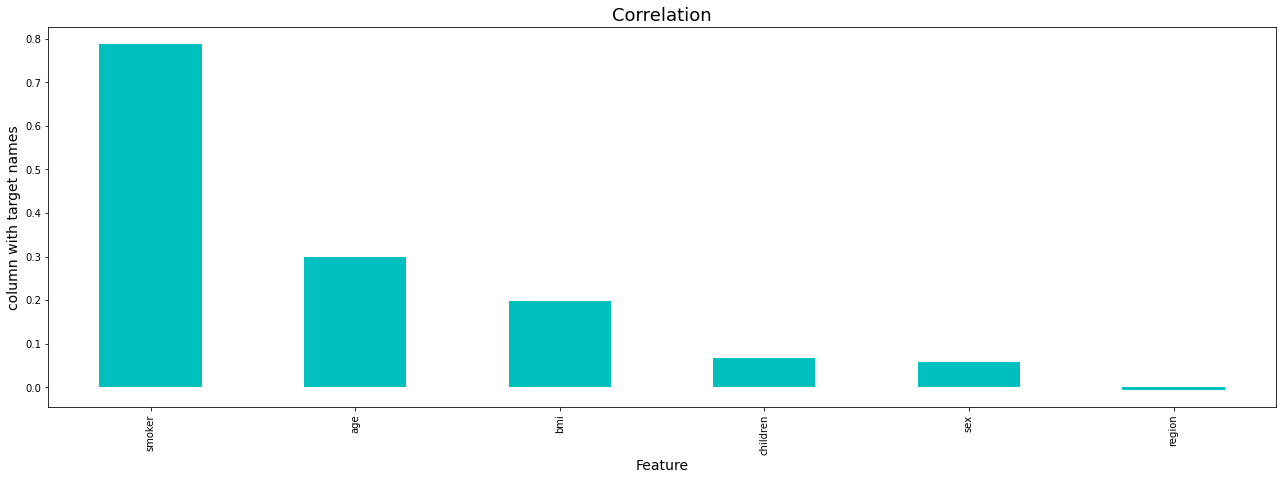

In [48]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


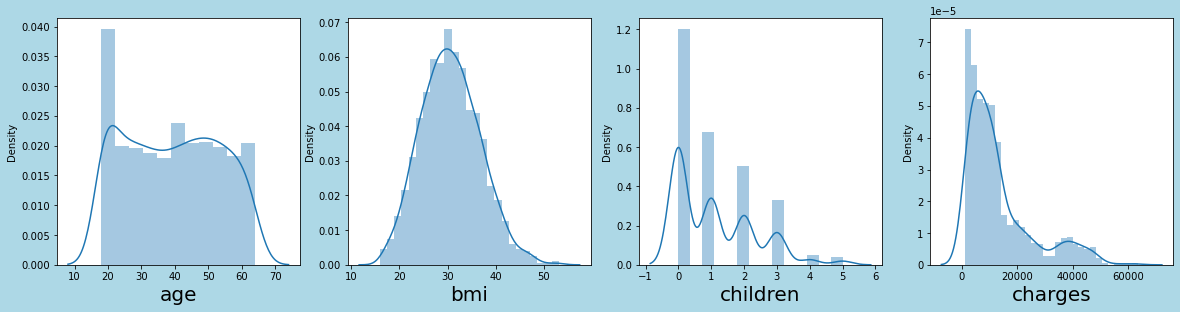

In [50]:
# let's see how data is distributed for every column

plt.figure(figsize=(20,10), facecolor='lightblue')
plotnumber = 1

for column in df1:
    if plotnumber <= 7:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column, fontsize=20)
    plotnumber += 1
plt.show()

In [51]:
df1.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

 We reduce skewness for continous data. Ideal value for skewness being +/- 0.5 . Skewness for categorical and target variable is not treated

In [52]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

The columns having skewness are categorical(i.e., sex, children, smoker,region and charges). charges is target variable and its skewnwss is not considered, column bmi is skewed properly. So, no need to treat skewness

# Outliers Check

In [53]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
charges     float64
dtype: object

checking the outliers on the int and float type of column(original dataset)

<AxesSubplot:>

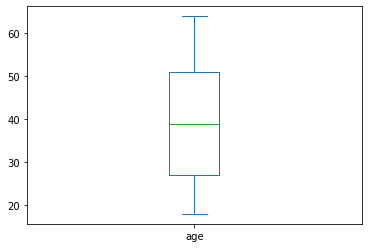

In [54]:
df['age'].plot.box()

<AxesSubplot:>

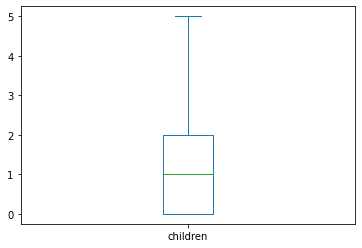

In [55]:
df['children'].plot.box()

<AxesSubplot:>

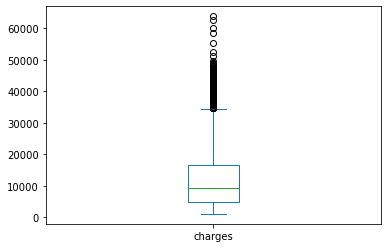

In [56]:
df['charges'].plot.box()

Since, charges is target variable, we do not remove outliers

In [57]:
df.shape

(1337, 7)

In [58]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threhold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         639,  818,  846,  876,  931,  936,  968,  983, 1046, 1084, 1115,
        1129, 1145, 1229, 1244, 1271, 1299, 1316], dtype=int64),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2], dtype=int64))

In [59]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [60]:
data_loss = (1337-1308)/1337
data_loss

0.02169035153328347

Very less amount of loss percentage, so outliers can be removed or may not be removed

In [61]:
df_new_z.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520


# Dividing dataset into features(x) and label(y)

In [62]:

x = df_new_z.drop(columns=['charges'],axis=1)
y = df_new_z['charges']

In [63]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0


In [64]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [65]:
x.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region      float64
dtype: object

# scaling the data

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [67]:
x_scaled

array([[-1.44075415, -1.00459773, -0.44918647, -0.93027909,  1.98389744,
         1.35199437],
       [-1.51180593,  0.99542332,  0.5331877 , -0.04080171, -0.50405831,
         0.4469746 ],
       [-0.80128811,  0.99542332,  0.40432431,  1.73815304, -0.50405831,
         0.4469746 ],
       ...,
       [-1.51180593, -1.00459773,  1.04864127, -0.93027909, -0.50405831,
         0.4469746 ],
       [-1.29865058, -1.00459773, -0.80063208, -0.93027909, -0.50405831,
         1.35199437],
       [ 1.54342071, -1.00459773, -0.25338105, -0.93027909,  1.98389744,
        -0.45804517]])

# Train Test Split

In [68]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr = LinearRegression()


In [76]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is: ,{r2_score(y_train,pred_train)}")   
    
    print(f"At random state {i}, the testing accuracy is , {r2_score(y_test,pred_test)}")  
    print("\n")

At random state 0, the training accuracy is: ,0.7418641728212639
At random state 0, the testing accuracy is , 0.7891497688487263


At random state 1, the training accuracy is: ,0.751137753986559
At random state 1, the testing accuracy is , 0.7539264856717148


At random state 2, the training accuracy is: ,0.751087332223536
At random state 2, the testing accuracy is , 0.7580176746331493


At random state 3, the training accuracy is: ,0.7455561260773549
At random state 3, the testing accuracy is , 0.7804867269045619


At random state 4, the training accuracy is: ,0.7468296668758672
At random state 4, the testing accuracy is , 0.7725191273457489


At random state 5, the training accuracy is: ,0.7498641233157852
At random state 5, the testing accuracy is , 0.762317648429856


At random state 6, the training accuracy is: ,0.7431316254713456
At random state 6, the testing accuracy is , 0.7935786887733283


At random state 7, the training accuracy is: ,0.7399651533756961
At random state 7, th

In [77]:
 x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=39)

In [78]:
lr.fit(x_train,y_train)

LinearRegression()

In [79]:
pred_test = lr.predict(x_test)

# Cross Validation Score

In [80]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test, pred_test)

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At Cross fold {j}, the Cross validation score is {cv_mean} and Accuracy score for training is {train_accuracy} and Accuracy score for testing is {test_accuracy}")
    print("\n")

At Cross fold 2, the Cross validation score is 0.7505322677761332 and Accuracy score for training is -0.8034314508485865 and Accuracy score for testing is 0.752523522238582


At Cross fold 3, the Cross validation score is 0.7480357150883492 and Accuracy score for training is -0.8034314508485865 and Accuracy score for testing is 0.752523522238582


At Cross fold 4, the Cross validation score is 0.7462580193873517 and Accuracy score for training is -0.8034314508485865 and Accuracy score for testing is 0.752523522238582


At Cross fold 5, the Cross validation score is 0.7505580662519831 and Accuracy score for training is -0.8034314508485865 and Accuracy score for testing is 0.752523522238582


At Cross fold 6, the Cross validation score is 0.7476356290130673 and Accuracy score for training is -0.8034314508485865 and Accuracy score for testing is 0.752523522238582


At Cross fold 7, the Cross validation score is 0.7473871022248522 and Accuracy score for training is -0.8034314508485865 and 

In [74]:
y_pred = lr.predict(x_test)

In [75]:
print(r2_score(y_test,pred_test))

0.752523522238582
